In [12]:
import scipy.stats as ss
import pandas as pd
import numpy as np
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt
%matplotlib inline

На этот раз ситуация следующая: вы работаете в приложении по доставке готовых продуктов. К вам пришел коллега с результатами двух тестов: <br>
•	В первом тестировали разрешение фотографий блюд в приложении: пользователям показывались либо прямоугольные, либо новые квадратные <br>
•	Во втором: была обновлена кнопка заказа, и часть юзеров видела старый вариант, а часть – новый <br>
Коллега пришел к вам с просьбой: он посмотрел на графики и предположил, что среди групп могут встретиться различия. <br>

Ваша задача – помочь ему проверить гипотезы, сделать соответствующие выводы на основе статистических тестов и принять решения.ия.


1.	Выберите метод, который предположительно подойдет в первом вопросе.

Однофакторный ANOVA, т.к. у нас три группы. <br>
Зависимая переменная: events (сколько блюд заказано) <br>
Независимая переменная: разрешение картинки (A,B,C) <br>

**H0:** Различий в количестве заказанных блюд в зависимости от разрешения картинки нет. <br>
**H1:** Различия в количестве заказнных блюд в зависимости от разрешения есть.

Для дисперсионного анализа необходимо проверить:
1. Гомогенность дисперсий
2. Размер выборок для каждой группы
3. Нормальность распределений

2.	Проверьте, являются ли дисперсии внутри групп гомогенными.

In [14]:
photo_data = pd.read_csv('5_task_1.csv')
photo_data.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [16]:
group_A = photo_data.query('group == "A"')
group_B = photo_data.query('group == "B"')
group_C = photo_data.query('group == "C"')

In [30]:
events_A = group_A.events
events_B = group_B.events
events_C = group_C.events

In [34]:
# Статистически значимых различий нет, дисперсии гомогенные.
ss.levene(events_A,events_B,events_C)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

3.	Проведите тест на нормальность распределения.

In [43]:
ss.normaltest(events_A)

NormaltestResult(statistic=2.1034599402238734, pvalue=0.3493328906085719)

In [45]:
ss.normaltest(events_B)

NormaltestResult(statistic=0.8410715800223014, pvalue=0.6566948749848232)

In [47]:
ss.normaltest(events_C)

NormaltestResult(statistic=3.243725809054571, pvalue=0.19753037588314626)

Все распределения являются нормальными.

4.	Сравните средние в представленных группах.

In [53]:
photo_data.groupby('group').events.mean()

group
A    29.5796
B    37.6136
C    27.4703
Name: events, dtype: float64

5.	Используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 

In [56]:
pg.pairwise_tukey(data = photo_data, dv = "events", between ="group")

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.0,-0.806229
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.0,0.210514
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.0,1.024138


In [119]:
pg.anova(data = photo_data, dv = "events", between = "group")

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,29997,2886.166657,0.0,0.161377


Статистически значимые различия находятся между всеми группами.

<Axes: xlabel='group', ylabel='events'>

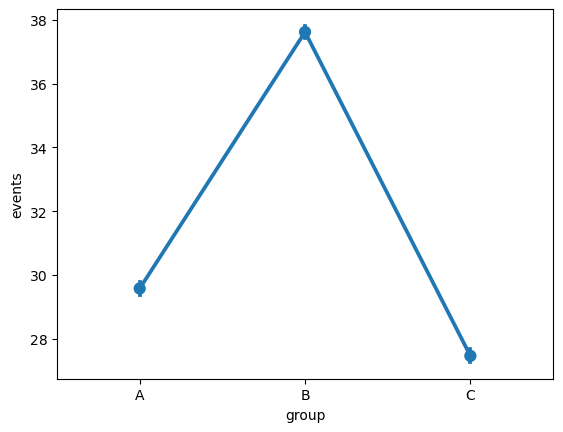

In [60]:
sns.pointplot(data = photo_data, y = 'events', x = 'group') 

6.	Примите решение: какие картинки в итоге будем использовать?

Будем использовать квадратные картинки, т.к. у них статистически значимо различия в лучшую сторону.

7.	Выберите метод для второго теста.

Выберем многофакторный дисперсионный анализ ANOVA. <br>
Зависимая переменная: events (число заказов) <br>
Независимые переменные: группа, сегмент клиента <br>

In [66]:
button_data = pd.read_csv('5_task_2.csv')
button_data.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [104]:
test_events = button_data.query('group == "test"').events
control_events = button_data.query('group == "control"').events
high_events = button_data.query('segment == "high"').events
low_events = button_data.query('segment == "low"').events

In [94]:
ss.normaltest(test_events)

NormaltestResult(statistic=9409.848694674323, pvalue=0.0)

In [96]:
ss.normaltest(control_events)

NormaltestResult(statistic=10546.476411049787, pvalue=0.0)

In [98]:
ss.levene(test_events, control_events)

LeveneResult(statistic=2.5440050816535327, pvalue=0.11071679229795423)

In [106]:
ss.levene(high_events, low_events)

LeveneResult(statistic=335.19310696785004, pvalue=9.423048025627678e-75)

8.	Визуализируйте распределение events для контрольной и тестовой групп. 

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='events', ylabel='Count'>

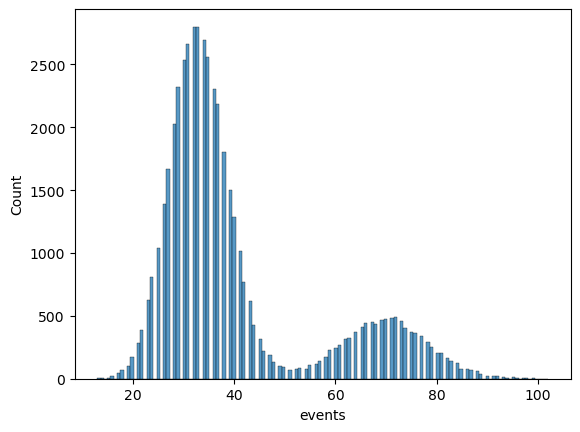

In [84]:
sns.histplot(test_events)

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='events', ylabel='Count'>

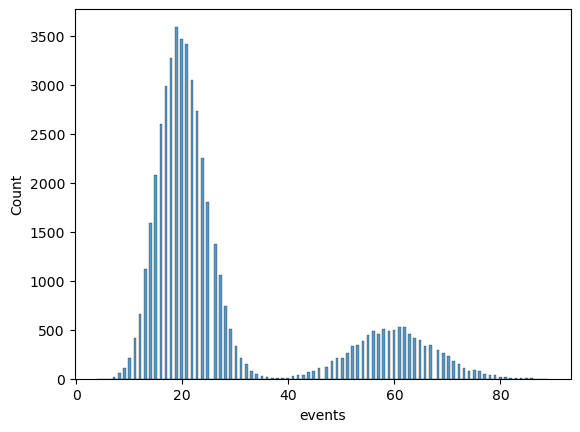

In [86]:
sns.histplot(control_events)

9.	Посмотрите на описательные статистики events в разбивке по группе и по сегменту пользователя. 

In [89]:
button_data.groupby(['group','segment']).events.describe()

count       mean       std   min   25%   50%   75%    max
group   segment                                                             
control high     10000.0  59.970800  7.805347  31.0  55.0  60.0  65.0   89.0
        low      40000.0  20.031575  4.473576   4.0  17.0  20.0  23.0   41.0
test    high     10000.0  69.938500  8.403974  40.0  64.0  70.0  76.0  102.0
        low      40000.0  33.025925  5.720845  13.0  29.0  33.0  37.0   59.0

10. Выберите формулу для модели, проведите тест.

In [113]:
pg.anova(data = button_data, dv = "events", between=['group','segment'])

,Source,SS,DF,MS,F,p-unc,np2
0,group,3.837195e+06,1.0,3.837195e+06,112031.864119,0.000000e+00,0.528383
1,segment,2.362480e+07,1.0,2.362480e+07,689756.377485,0.000000e+00,0.873383
2,group * segment,3.664244e+04,1.0,3.664244e+04,1069.823273,2.060261e-233,0.010585
3,Residual,3.424956e+06,99996.0,3.425093e+01,NaN,NaN,NaN


<Axes: xlabel='group', ylabel='events'>

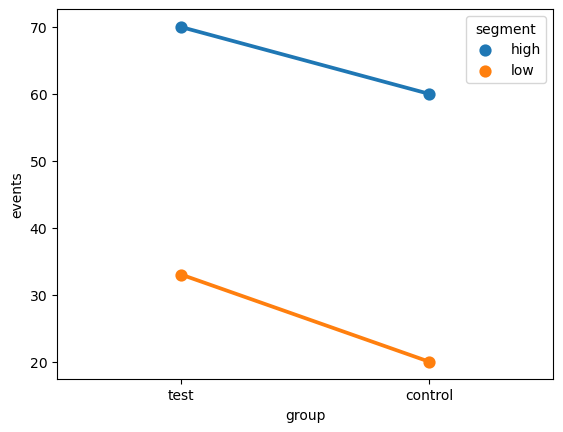

In [117]:
sns.pointplot(x="group", y = "events", hue = "segment", data = button_data)